In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read in all data sets
gucheng = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv').dropna(how='any')
shunyi = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv').dropna(how='any')
tiantan = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv').dropna(how='any')
wanliu = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv').dropna(how='any')
dongsi = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv').dropna(how='any')
huariou = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv').dropna(how='any')
dingling = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv').dropna(how='any')
aotizhongxin = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv').dropna(how='any')

In [3]:
gucheng.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
20,21,2013,3,1,20,13.0,25.0,12.0,5.0,1100.0,61.0,1.6,1027.1,-18.4,0.0,ESE,1.9,Gucheng
21,22,2013,3,1,21,15.0,23.0,14.0,13.0,1200.0,52.0,1.0,1028.1,-17.4,0.0,SSE,0.7,Gucheng
22,23,2013,3,1,22,16.0,28.0,16.0,19.0,1200.0,45.0,1.3,1028.4,-17.6,0.0,E,1.0,Gucheng
23,24,2013,3,1,23,16.0,28.0,14.0,20.0,1100.0,44.0,0.2,1028.6,-17.6,0.0,ESE,1.1,Gucheng
24,25,2013,3,2,0,14.0,18.0,24.0,43.0,1399.0,25.0,-0.3,1028.9,-18.0,0.0,ENE,1.4,Gucheng


In [4]:
districts = ['gucheng', 'shunyi', 'tiantan', 'wanliu', 'dongsi', 'huariou', 'dingling', 'aotizhongxin']
data_months = {'1' : '01', '2' : '02', '3' : '03', '4' : '04', '5' : '05', '6' : '06', '7' : '07', '8' : '08', '9' : '09'}
data_days = {'1' : '01', '2' : '02', '3' : '03', '4' : '04', '5' : '05', '6' : '06', '7' : '07', '8' : '08', '9' : '09'}
month_names = {'01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', '06': 'June', '07': 'July', '08': ' August', '09': 'September', '10': 'October', '11': ' November', '12': 'December'}

In [5]:
gucheng['month'] = gucheng['month'].apply(lambda x: data_months[str(x)] if int(x) < 10 else str(x))
gucheng['day'] = gucheng['day'].apply(lambda x: data_days[str(x)] if int(x) < 10 else str(x))

shunyi['month'] = shunyi['month'].apply(lambda x: data_months[str(x)] if int(x) < 10 else str(x))
shunyi['day'] = shunyi['day'].apply(lambda x: data_days[str(x)] if int(x) < 10 else str(x))

tiantan['month'] = tiantan['month'].apply(lambda x: data_months[str(x)] if int(x) < 10 else str(x))
tiantan['day'] = tiantan['day'].apply(lambda x: data_days[str(x)] if int(x) < 10 else str(x))

wanliu['month'] = wanliu['month'].apply(lambda x: data_months[str(x)] if int(x) < 10 else str(x))
wanliu['day'] = wanliu['day'].apply(lambda x: data_days[str(x)] if int(x) < 10 else str(x))


dongsi['month'] = dongsi['month'].apply(lambda x: data_months[str(x)] if int(x) < 10 else str(x))
dongsi['day'] = dongsi['day'].apply(lambda x: data_days[str(x)] if int(x) < 10 else str(x))

huariou['month'] = huariou['month'].apply(lambda x: data_months[str(x)] if int(x) < 10 else str(x))
huariou['day'] = huariou['day'].apply(lambda x: data_days[str(x)] if int(x) < 10 else str(x))

dingling['month'] = dingling['month'].apply(lambda x: data_months[str(x)] if int(x) < 10 else str(x))
dingling['day'] = dingling['day'].apply(lambda x: data_days[str(x)] if int(x) < 10 else str(x))

aotizhongxin['month'] = aotizhongxin['month'].apply(lambda x: data_months[str(x)] if int(x) < 10 else str(x))
aotizhongxin['day'] = aotizhongxin['day'].apply(lambda x: data_days[str(x)] if int(x) < 10 else str(x))

In [6]:
gucheng.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
20,21,2013,03,01,20,13.0,25.0,12.0,5.0,1100.0,61.0,1.6,1027.1,-18.4,0.0,ESE,1.9,Gucheng
21,22,2013,03,01,21,15.0,23.0,14.0,13.0,1200.0,52.0,1.0,1028.1,-17.4,0.0,SSE,0.7,Gucheng
22,23,2013,03,01,22,16.0,28.0,16.0,19.0,1200.0,45.0,1.3,1028.4,-17.6,0.0,E,1.0,Gucheng
23,24,2013,03,01,23,16.0,28.0,14.0,20.0,1100.0,44.0,0.2,1028.6,-17.6,0.0,ESE,1.1,Gucheng
24,25,2013,03,02,0,14.0,18.0,24.0,43.0,1399.0,25.0,-0.3,1028.9,-18.0,0.0,ENE,1.4,Gucheng


In [7]:
gucheng['date'] = gucheng.apply(lambda x: '{}-{}-{}'.format(x['month'], x['day'], x['year']), axis = 1)
shunyi['date'] = shunyi.apply(lambda x: '{}-{}-{}'.format(x['month'], x['day'], x['year']), axis = 1)
tiantan['date'] = tiantan.apply(lambda x: '{}-{}-{}'.format(x['month'], x['day'], x['year']), axis = 1)
wanliu['date'] = wanliu.apply(lambda x: '{}-{}-{}'.format(x['month'], x['day'], x['year']), axis = 1)
dongsi['date'] = dongsi.apply(lambda x: '{}-{}-{}'.format(x['month'], x['day'], x['year']), axis = 1)
huariou['date'] = huariou.apply(lambda x: '{}-{}-{}'.format(x['month'], x['day'], x['year']), axis = 1)
dingling['date'] = dingling.apply(lambda x: '{}-{}-{}'.format(x['month'], x['day'], x['year']), axis = 1)
aotizhongxin['date'] = aotizhongxin.apply(lambda x: '{}-{}-{}'.format(x['month'], x['day'], x['year']), axis = 1)

In [8]:
#converting str date inputs to datetime objects in pandas
gucheng['date'] = gucheng['date'].apply(lambda x: datetime.strptime(x, '%m-%d-%Y'))
shunyi['date'] = shunyi['date'].apply(lambda x: datetime.strptime(x, '%m-%d-%Y'))
tiantan['date'] = tiantan['date'].apply(lambda x: datetime.strptime(x, '%m-%d-%Y'))
wanliu['date'] = wanliu['date'].apply(lambda x: datetime.strptime(x, '%m-%d-%Y'))
dongsi['date'] = dongsi['date'].apply(lambda x: datetime.strptime(x, '%m-%d-%Y'))
huariou['date'] = huariou['date'].apply(lambda x: datetime.strptime(x, '%m-%d-%Y'))
dingling['date'] = dingling['date'].apply(lambda x: datetime.strptime(x, '%m-%d-%Y'))
aotizhongxin['date'] = aotizhongxin['date'].apply(lambda x: datetime.strptime(x, '%m-%d-%Y'))

In [9]:
gucheng.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
20,21,2013,03,01,20,13.0,25.0,12.0,5.0,1100.0,61.0,1.6,1027.1,-18.4,0.0,ESE,1.9,Gucheng,2013-03-01
21,22,2013,03,01,21,15.0,23.0,14.0,13.0,1200.0,52.0,1.0,1028.1,-17.4,0.0,SSE,0.7,Gucheng,2013-03-01
22,23,2013,03,01,22,16.0,28.0,16.0,19.0,1200.0,45.0,1.3,1028.4,-17.6,0.0,E,1.0,Gucheng,2013-03-01
23,24,2013,03,01,23,16.0,28.0,14.0,20.0,1100.0,44.0,0.2,1028.6,-17.6,0.0,ESE,1.1,Gucheng,2013-03-01
24,25,2013,03,02,0,14.0,18.0,24.0,43.0,1399.0,25.0,-0.3,1028.9,-18.0,0.0,ENE,1.4,Gucheng,2013-03-02


In [10]:
#create dictionary of seasonal dates to group data based on the seasonal year

seasons_2013_14 = {'spring_date_2013': '2013-03-01', 'summer_date_2013' : '2013-06-01', 'fall_date_2013' : '2013-09-01', 'winter_date_2013_14' : '2013-12-01'}

seasons_2014_15 = {'spring_date_2014': '2014-03-01', 'summer_date_2014' : '2014-06-01', 'fall_date_2014' : '2014-09-01', 'winter_date_2014_15' : '2014-12-01'}

seasons_2015_16 = {'spring_date_2015': '2015-03-01', 'summer_date_2015' : '2015-06-01', 'fall_date_2015' : '2015-09-01', 'winter_date_2015_16' : '2015-12-01'}

seasons_2016_17 = {'spring_date_2016': '2016-03-01', 'summer_date_2016' : '2016-06-01', 'fall_date_2016' : '2016-09-01', 'winter_date_2016_17' : '2016-12-01'}

In [11]:
#Splitting data into separate Seasonal Years. Data is consolidated for each day by taking the average of the recorded results over the 24-hour logged period.

#Year 1 data between March 2013 and Feb 2014 (Beginning Spring 2013 - End of Winter 2013_14)
aotizhongxin_yr1 = aotizhongxin[(aotizhongxin['date'] < seasons_2014_15['spring_date_2014']) & (aotizhongxin['date'] >= seasons_2013_14['spring_date_2013'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
gucheng_yr1 = gucheng[(gucheng['date'] < seasons_2014_15['spring_date_2014']) & (gucheng['date'] >= seasons_2013_14['spring_date_2013'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
shunyi_yr1 = shunyi[(shunyi['date'] < seasons_2014_15['spring_date_2014']) & (shunyi['date'] >= seasons_2013_14['spring_date_2013'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
tiantan_yr1 = tiantan[(tiantan['date'] < seasons_2014_15['spring_date_2014']) & (tiantan['date'] >= seasons_2013_14['spring_date_2013'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
wanliu_yr1 = wanliu[(wanliu['date'] < seasons_2014_15['spring_date_2014']) & (wanliu['date'] >= seasons_2013_14['spring_date_2013'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
dongsi_yr1 = dongsi[(dongsi['date'] < seasons_2014_15['spring_date_2014']) & (dongsi['date'] >= seasons_2013_14['spring_date_2013'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
huariou_yr1 = huariou[(huariou['date'] < seasons_2014_15['spring_date_2014']) & (huariou['date'] >= seasons_2013_14['spring_date_2013'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
dingling_yr1 = dingling[(dingling['date'] < seasons_2014_15['spring_date_2014']) & (dingling['date'] >= seasons_2013_14['spring_date_2013'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()


# #Year 2 data between March 2014 and Feb 2015
aotizhongxin_yr2 = aotizhongxin[(aotizhongxin['date'] < seasons_2015_16['spring_date_2015']) & (aotizhongxin['date'] >= seasons_2014_15['spring_date_2014'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
gucheng_yr2 = gucheng[(gucheng['date'] < seasons_2015_16['spring_date_2015']) & (gucheng['date'] >= seasons_2014_15['spring_date_2014'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
shunyi_yr2 = shunyi[(shunyi['date'] < seasons_2015_16['spring_date_2015']) & (shunyi['date'] >= seasons_2014_15['spring_date_2014'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
tiantan_yr2 = tiantan[(tiantan['date'] < seasons_2015_16['spring_date_2015']) & (tiantan['date'] >= seasons_2014_15['spring_date_2014'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
wanliu_yr2 = wanliu[(wanliu['date'] < seasons_2015_16['spring_date_2015']) & (wanliu['date'] >= seasons_2014_15['spring_date_2014'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
dongsi_yr2 = dongsi[(dongsi['date'] < seasons_2015_16['spring_date_2015']) & (dongsi['date'] >= seasons_2014_15['spring_date_2014'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
huariou_yr2 = huariou[(huariou['date'] < seasons_2015_16['spring_date_2015']) & (huariou['date'] >= seasons_2014_15['spring_date_2014'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
dingling_yr2 = dingling[(dingling['date'] < seasons_2015_16['spring_date_2015']) & (dingling['date'] >= seasons_2014_15['spring_date_2014'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()


#Year 3 data between March 2015 and Feb 2016
aotizhongxin_yr3 = aotizhongxin[(aotizhongxin['date'] < seasons_2016_17['spring_date_2016']) & (aotizhongxin['date'] >= seasons_2015_16['spring_date_2015'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
gucheng_yr3 = gucheng[(gucheng['date'] < seasons_2016_17['spring_date_2016']) & (gucheng['date'] >= seasons_2015_16['spring_date_2015'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
shunyi_yr3 = shunyi[(shunyi['date'] < seasons_2016_17['spring_date_2016']) & (shunyi['date'] >= seasons_2015_16['spring_date_2015'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
tiantan_yr3 = tiantan[(tiantan['date'] < seasons_2016_17['spring_date_2016']) & (tiantan['date'] >= seasons_2015_16['spring_date_2015'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
wanliu_yr3 = wanliu[(wanliu['date'] < seasons_2016_17['spring_date_2016']) & (wanliu['date'] >= seasons_2015_16['spring_date_2015'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
dongsi_yr3 = dongsi[(dongsi['date'] < seasons_2016_17['spring_date_2016']) & (dongsi['date'] >= seasons_2015_16['spring_date_2015'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
huariou_yr3 = huariou[(huariou['date'] < seasons_2016_17['spring_date_2016']) & (huariou['date'] >= seasons_2015_16['spring_date_2015'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
dingling_yr3 = dingling[(dingling['date'] < seasons_2016_17['spring_date_2016']) & (dingling['date'] >= seasons_2015_16['spring_date_2015'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()


#Year 4 data between March 2016 and Feb 2017
aotizhongxin_yr4 = aotizhongxin[aotizhongxin['date'] >= seasons_2016_17['spring_date_2016']].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
gucheng_yr4 = gucheng[(gucheng['date'] >= seasons_2016_17['spring_date_2016'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
shunyi_yr4 = shunyi[(shunyi['date'] >= seasons_2016_17['spring_date_2016'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
tiantan_yr4 = tiantan[(tiantan['date'] >= seasons_2016_17['spring_date_2016'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
wanliu_yr4 = wanliu[wanliu['date'] >= seasons_2016_17['spring_date_2016']].groupby(['month','day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
dongsi_yr4 = dongsi[(dongsi['date'] >= seasons_2016_17['spring_date_2016'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
huariou_yr4 = huariou[(huariou['date'] >= seasons_2016_17['spring_date_2016'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()
dingling_yr4 = dingling[(dingling['date'] >= seasons_2016_17['spring_date_2016'])].groupby(['month', 'day']).mean().drop(columns=['hour', 'No']).sort_values(['year', 'month']).reset_index()

In [12]:
pm2 = {'pm2_good' : (0, 15.4), 'pm2_moderate' : (15.5, 40.4), 'pm2_usg' : (40.5, 65.4), 'pm2_unhealthy' : (65.5, 150.4), 'pm2_veryunhealthy' : (150.5, 250.4), 'pm2_hazardous' : (250.5, 500.4)}
pm10 = {'pm10_good' : (0, 54), 'pm10_moderate' : (55, 154), 'pm10_usg' : (155, 254), 'pm10_unhealthy' : (255, 354), 'pm10_veryunhealthy' : (355, 424), 'pm10_hazardous' : (425, 604)}
aqis = {'aqi_good' : (0, 50),'aqi_moderate' : (51, 100),'aqi_usg' : (101, 150),'aqi_unhealthy' : (151, 200),'aqi_veryunhealthy' : (201, 300),'aqi_hazardous' : (301, 500)}

In [13]:
def compute_aqi2(data_list): 
    
    aqi2_list = []
    
    
    for i in data_list: 
        if (i >= pm2['pm2_good'][0]) & (i <= pm2['pm2_good'][1]):
            aqi = ((i - pm2['pm2_good'][0])*(aqis['aqi_good'][1] - aqis['aqi_good'][0])/(pm2['pm2_good'][1] - pm2['pm2_good'][0])) + aqis['aqi_good'][0]
        elif (i >= pm2['pm2_moderate'][0] ) & (i <= pm2['pm2_moderate'][1]):
            aqi = ((i - pm2['pm2_moderate'][0])*(aqis['aqi_moderate'][1] - aqis['aqi_moderate'][0])/(pm2['pm2_moderate'][1] - pm2['pm2_moderate'][0])) + aqis['aqi_moderate'][0]
        elif (i >= pm2['pm2_usg'][0] ) & (i <= pm2['pm2_usg'][1]):
            aqi = ((i - pm2['pm2_usg'][0])*(aqis['aqi_usg'][1] - aqis['aqi_usg'][0])/(pm2['pm2_usg'][1] - pm2['pm2_usg'][0])) + aqis['aqi_usg'][0]
        elif (i >= pm2['pm2_unhealthy'][0] ) & (i <= pm2['pm2_unhealthy'][1]):
            aqi = ((i - pm2['pm2_unhealthy'][0])*(aqis['aqi_unhealthy'][1] - aqis['aqi_unhealthy'][0])/(pm2['pm2_unhealthy'][1] - pm2['pm2_unhealthy'][0])) + aqis['aqi_unhealthy'][0]
        elif (i >= pm2['pm2_veryunhealthy'][0] ) & (i <= pm2['pm2_veryunhealthy'][1]):
            aqi = ((i - pm2['pm2_veryunhealthy'][0])*(aqis['aqi_veryunhealthy'][1] - aqis['aqi_veryunhealthy'][0])/(pm2['pm2_veryunhealthy'][1] - pm2['pm2_veryunhealthy'][0])) + aqis['aqi_veryunhealthy'][0]
        else: 
            aqi = ((i - pm2['pm2_hazardous'][0])*(aqis['aqi_hazardous'][1] - aqis['aqi_hazardous'][0])/(pm2['pm2_hazardous'][1] - pm2['pm2_hazardous'][0])) + aqis['aqi_hazardous'][0]

            
        aqi2_list.append(aqi)
    
    return aqi2_list
            
            
            
            

In [14]:
def compute_aqi10(data_list): 
    
    aqi10_list = []
    
    for i in data_list: 
        if (i >= pm10['pm10_good'][0]) & (i <= pm10['pm10_good'][1]):
            aqi = ((i - pm10['pm10_good'][0])*(aqis['aqi_good'][1] - aqis['aqi_good'][0])/(pm10['pm10_good'][1] - pm10['pm10_good'][0])) + aqis['aqi_good'][0]
        elif (i >= pm10['pm10_moderate'][0] ) & (i <= pm10['pm10_moderate'][1]):
            aqi = ((i - pm10['pm10_moderate'][0])*(aqis['aqi_moderate'][1] - aqis['aqi_moderate'][0])/(pm10['pm10_moderate'][1] - pm10['pm10_moderate'][0])) + aqis['aqi_moderate'][0]
        elif (i >= pm10['pm10_usg'][0] ) & (i <= pm10['pm10_usg'][1]):
            aqi = ((i - pm10['pm10_usg'][0])*(aqis['aqi_usg'][1] - aqis['aqi_usg'][0])/(pm10['pm10_usg'][1] - pm10['pm10_usg'][0])) + aqis['aqi_usg'][0]
        elif (i >= pm10['pm10_unhealthy'][0] ) & (i <= pm10['pm10_unhealthy'][1]):
            aqi = ((i - pm10['pm10_unhealthy'][0])*(aqis['aqi_unhealthy'][1] - aqis['aqi_unhealthy'][0])/(pm10['pm10_unhealthy'][1] - pm10['pm10_unhealthy'][0])) + aqis['aqi_unhealthy'][0]
        elif (i >= pm10['pm10_veryunhealthy'][0] ) & (i <= pm10['pm10_veryunhealthy'][1]):
            aqi = ((i - pm10['pm10_veryunhealthy'][0])*(aqis['aqi_veryunhealthy'][1] - aqis['aqi_veryunhealthy'][0])/(pm10['pm10_veryunhealthy'][1] - pm10['pm10_veryunhealthy'][0])) + aqis['aqi_veryunhealthy'][0]
        else: 
            aqi = ((i - pm10['pm10_hazardous'][0])*(aqis['aqi_hazardous'][1] - aqis['aqi_hazardous'][0])/(pm10['pm10_hazardous'][1] - pm10['pm10_hazardous'][0])) + aqis['aqi_hazardous'][0]
        aqi10_list.append(aqi)
    
    return aqi10_list
            
            

In [15]:
aotizhongxin_yr1_aqis = aotizhongxin_yr1.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(aotizhongxin_yr1['PM2.5'])),
        'AQI PM10': compute_aqi10(list(aotizhongxin_yr1['PM10']))
    }, index=aotizhongxin_yr1.index
))

aotizhongxin_yr2_aqis = aotizhongxin_yr2.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(aotizhongxin_yr2['PM2.5'])),
        'AQI PM10': compute_aqi10(list(aotizhongxin_yr2['PM10']))
    }, index=aotizhongxin_yr2.index
))


aotizhongxin_yr3_aqis = aotizhongxin_yr3.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(aotizhongxin_yr3['PM2.5'])),
        'AQI PM10': compute_aqi10(list(aotizhongxin_yr3['PM10']))
    }, index=aotizhongxin_yr3.index
))


aotizhongxin_yr4_aqis = aotizhongxin_yr4.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(aotizhongxin_yr4['PM2.5'])),
        'AQI PM10': compute_aqi10(list(aotizhongxin_yr4['PM10']))
    }, index=aotizhongxin_yr4.index
))




In [16]:
gucheng_yr1_aqis = gucheng_yr1.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(gucheng_yr1['PM2.5'])),
        'AQI PM10': compute_aqi10(list(gucheng_yr1['PM10']))
    }, index=gucheng_yr1.index
))

gucheng_yr2_aqis = gucheng_yr2.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(gucheng_yr2['PM2.5'])),
        'AQI PM10': compute_aqi10(list(gucheng_yr2['PM10']))
    }, index=gucheng_yr2.index
))


gucheng_yr3_aqis = gucheng_yr3.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(gucheng_yr3['PM2.5'])),
        'AQI PM10': compute_aqi10(list(gucheng_yr3['PM10']))
    }, index=gucheng_yr3.index
))


gucheng_yr4_aqis = gucheng_yr4.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(gucheng_yr4['PM2.5'])),
        'AQI PM10': compute_aqi10(list(gucheng_yr4['PM10']))
    }, index=gucheng_yr4.index
))



In [17]:
shunyi_yr1_aqis = shunyi_yr1.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(shunyi_yr1['PM2.5'])),
        'AQI PM10': compute_aqi10(list(shunyi_yr1['PM10']))
    }, index=shunyi_yr1.index
))

shunyi_yr2_aqis = shunyi_yr2.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(shunyi_yr2['PM2.5'])),
        'AQI PM10': compute_aqi10(list(shunyi_yr2['PM10']))
    }, index=shunyi_yr2.index
))

shunyi_yr3_aqis = shunyi_yr3.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(shunyi_yr3['PM2.5'])),
        'AQI PM10': compute_aqi10(list(shunyi_yr3['PM10']))
    }, index=shunyi_yr3.index
))

shunyi_yr4_aqis = shunyi_yr4.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(shunyi_yr4['PM2.5'])),
        'AQI PM10': compute_aqi10(list(shunyi_yr4['PM10']))
    }, index=shunyi_yr4.index
))



In [18]:
tiantan_yr1_aqis = tiantan_yr1.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(tiantan_yr1['PM2.5'])),
        'AQI PM10': compute_aqi10(list(tiantan_yr1['PM10']))
    }, index=tiantan_yr1.index
)).groupby(['year','month']).mean()

tiantan_yr2_aqis = tiantan_yr2.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(tiantan_yr2['PM2.5'])),
        'AQI PM10': compute_aqi10(list(tiantan_yr2['PM10']))
    }, index=tiantan_yr2.index
)).groupby(['year','month']).mean()

tiantan_yr3_aqis = tiantan_yr3.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(tiantan_yr3['PM2.5'])),
        'AQI PM10': compute_aqi10(list(tiantan_yr3['PM10']))
    }, index=tiantan_yr3.index
)).groupby(['year','month']).mean()

tiantan_yr4_aqis = tiantan_yr4.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(tiantan_yr4['PM2.5'])),
        'AQI PM10': compute_aqi10(list(tiantan_yr4['PM10']))
    }, index=tiantan_yr4.index
))



In [19]:
wanliu_yr1_aqis = wanliu_yr1.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(wanliu_yr1['PM2.5'])),
        'AQI PM10': compute_aqi10(list(wanliu_yr1['PM10']))
    }, index=wanliu_yr1.index
))

wanliu_yr2_aqis = wanliu_yr2.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(wanliu_yr2['PM2.5'])),
        'AQI PM10': compute_aqi10(list(wanliu_yr2['PM10']))
    }, index=wanliu_yr2.index
))

wanliu_yr3_aqis = wanliu_yr3.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(wanliu_yr3['PM2.5'])),
        'AQI PM10': compute_aqi10(list(wanliu_yr3['PM10']))
    }, index=wanliu_yr3.index
))

wanliu_yr4_aqis = wanliu_yr4.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(wanliu_yr4['PM2.5'])),
        'AQI PM10': compute_aqi10(list(wanliu_yr4['PM10']))
    }, index=wanliu_yr4.index
))


In [20]:
dongsi_yr1_aqis = dongsi_yr1.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(dongsi_yr1['PM2.5'])),
        'AQI PM10': compute_aqi10(list(dongsi_yr1['PM10']))
    }, index=dongsi_yr1.index
))

dongsi_yr2_aqis = dongsi_yr2.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(dongsi_yr2['PM2.5'])),
        'AQI PM10': compute_aqi10(list(dongsi_yr2['PM10']))
    }, index=dongsi_yr2.index
))

dongsi_yr3_aqis = dongsi_yr3.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(dongsi_yr3['PM2.5'])),
        'AQI PM10': compute_aqi10(list(dongsi_yr3['PM10']))
    }, index=dongsi_yr3.index
))

dongsi_yr4_aqis = dongsi_yr4.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(dongsi_yr4['PM2.5'])),
        'AQI PM10': compute_aqi10(list(dongsi_yr4['PM10']))
    }, index=dongsi_yr4.index
))

In [21]:
dingling_yr1_aqis = dingling_yr1.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(dingling_yr1['PM2.5'])),
        'AQI PM10': compute_aqi10(list(dingling_yr1['PM10']))
    }, index=dingling_yr1.index
))

dingling_yr2_aqis = dingling_yr2.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(dingling_yr2['PM2.5'])),
        'AQI PM10': compute_aqi10(list(dingling_yr2['PM10']))
    }, index=dingling_yr2.index
))

dingling_yr3_aqis = dingling_yr3.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(dingling_yr3['PM2.5'])),
        'AQI PM10': compute_aqi10(list(dingling_yr3['PM10']))
    }, index=dingling_yr3.index
))

dingling_yr4_aqis = dingling_yr4.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(dingling_yr4['PM2.5'])),
        'AQI PM10': compute_aqi10(list(dingling_yr4['PM10']))
    }, index=dingling_yr4.index
))

In [22]:
huariou_yr1_aqis = huariou_yr1.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(huariou_yr1['PM2.5'])),
        'AQI PM10': compute_aqi10(list(huariou_yr1['PM10']))
    }, index=huariou_yr1.index
))

huariou_yr2_aqis = huariou_yr2.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(huariou_yr2['PM2.5'])),
        'AQI PM10': compute_aqi10(list(huariou_yr2['PM10']))
    }, index=huariou_yr2.index
))

huariou_yr3_aqis = huariou_yr3.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(huariou_yr3['PM2.5'])),
        'AQI PM10': compute_aqi10(list(huariou_yr3['PM10']))
    }, index=huariou_yr3.index
))

huariou_yr4_aqis = huariou_yr4.join(pd.DataFrame({
        'AQI PM2.5': compute_aqi2(list(huariou_yr4['PM2.5'])),
        'AQI PM10': compute_aqi10(list(huariou_yr4['PM10']))
    }, index=huariou_yr4.index
))


In [23]:
#categorize aqi score level i.e. good/moderate/unhealthy etc.

aqis = {'aqi_good' : (0, 50),'aqi_moderate' : (51, 100),'aqi_usg' : (101, 150),
        'aqi_unhealthy' : (151, 200),'aqi_veryunhealthy' : (201, 300),'aqi_hazardous' : (301, 500)}

def aqi_level(x):
    levels = []
    for i in x:
        if (0 <= i <= 50):
            level = "good"
        elif (51 <= i <= 100):
            level = "moderate"
        elif (101 <= i <= 150):
            level = "usg"
        elif (151 <= i <= 200):
            level = "unhealthy"
        elif (201 <= i <= 300):
            level = "very unhealthy"
        elif (301 <= i <= 500):
            level = "hazardous"
        
        levels.append(level)
    return levels
            

In [24]:
gucheng_yr1_aqis['AQI2.5 level'] = aqi_level(gucheng_yr1_aqis['AQI PM2.5'])
gucheng_yr1_aqis['AQI10 level'] = aqi_level(gucheng_yr1_aqis['AQI PM10'])

gucheng_yr2_aqis['AQI2.5 level'] = aqi_level(gucheng_yr2_aqis['AQI PM2.5'])
gucheng_yr2_aqis['AQI10 level'] = aqi_level(gucheng_yr2_aqis['AQI PM10'])

gucheng_yr3_aqis['AQI2.5 level'] = aqi_level(gucheng_yr3_aqis['AQI PM2.5'])
gucheng_yr3_aqis['AQI10 level'] = aqi_level(gucheng_yr3_aqis['AQI PM10'])

gucheng_yr4_aqis['AQI2.5 level'] = aqi_level(gucheng_yr4_aqis['AQI PM2.5'])
gucheng_yr4_aqis['AQI10 level'] = aqi_level(gucheng_yr4_aqis['AQI PM10'])

In [25]:
aotizhongxin_yr1_aqis['AQI2.5 level'] = aqi_level(aotizhongxin_yr1_aqis['AQI PM2.5'])
aotizhongxin_yr1_aqis['AQI10 level'] = aqi_level(aotizhongxin_yr1_aqis['AQI PM10'])

aotizhongxin_yr2_aqis['AQI2.5 level'] = aqi_level(aotizhongxin_yr2_aqis['AQI PM2.5'])
aotizhongxin_yr2_aqis['AQI10 level'] = aqi_level(aotizhongxin_yr2_aqis['AQI PM10'])

aotizhongxin_yr3_aqis['AQI2.5 level'] = aqi_level(aotizhongxin_yr3_aqis['AQI PM2.5'])
aotizhongxin_yr3_aqis['AQI10 level'] = aqi_level(aotizhongxin_yr3_aqis['AQI PM10'])

aotizhongxin_yr4_aqis['AQI2.5 level'] = aqi_level(aotizhongxin_yr4_aqis['AQI PM2.5'])
aotizhongxin_yr4_aqis['AQI10 level'] = aqi_level(aotizhongxin_yr4_aqis['AQI PM10'])

In [26]:
shunyi_yr1_aqis['AQI2.5 level'] = aqi_level(shunyi_yr1_aqis['AQI PM2.5'])
shunyi_yr1_aqis['AQI10 level'] = aqi_level(shunyi_yr1_aqis['AQI PM10'])

shunyi_yr2_aqis['AQI2.5 level'] = aqi_level(shunyi_yr2_aqis['AQI PM2.5'])
shunyi_yr2_aqis['AQI10 level'] = aqi_level(shunyi_yr2_aqis['AQI PM10'])

shunyi_yr3_aqis['AQI2.5 level'] = aqi_level(shunyi_yr3_aqis['AQI PM2.5'])
shunyi_yr3_aqis['AQI10 level'] = aqi_level(shunyi_yr3_aqis['AQI PM10'])

shunyi_yr4_aqis['AQI2.5 level'] = aqi_level(shunyi_yr4_aqis['AQI PM2.5'])
shunyi_yr4_aqis['AQI10 level'] = aqi_level(shunyi_yr4_aqis['AQI PM10'])

In [27]:
tiantan_yr1_aqis['AQI2.5 level'] = aqi_level(tiantan_yr1_aqis['AQI PM2.5'])
tiantan_yr1_aqis['AQI10 level'] = aqi_level(tiantan_yr1_aqis['AQI PM10'])

tiantan_yr2_aqis['AQI2.5 level'] = aqi_level(tiantan_yr2_aqis['AQI PM2.5'])
tiantan_yr2_aqis['AQI10 level'] = aqi_level(tiantan_yr2_aqis['AQI PM10'])

tiantan_yr3_aqis['AQI2.5 level'] = aqi_level(tiantan_yr3_aqis['AQI PM2.5'])
tiantan_yr3_aqis['AQI10 level'] = aqi_level(tiantan_yr3_aqis['AQI PM10'])

tiantan_yr4_aqis['AQI2.5 level'] = aqi_level(tiantan_yr4_aqis['AQI PM2.5'])
tiantan_yr4_aqis['AQI10 level'] = aqi_level(tiantan_yr4_aqis['AQI PM10'])

In [28]:
wanliu_yr1_aqis['AQI2.5 level'] = aqi_level(wanliu_yr1_aqis['AQI PM2.5'])
wanliu_yr1_aqis['AQI10 level'] = aqi_level(wanliu_yr1_aqis['AQI PM10'])

wanliu_yr2_aqis['AQI2.5 level'] = aqi_level(wanliu_yr2_aqis['AQI PM2.5'])
wanliu_yr2_aqis['AQI10 level'] = aqi_level(wanliu_yr2_aqis['AQI PM10'])

wanliu_yr3_aqis['AQI2.5 level'] = aqi_level(wanliu_yr3_aqis['AQI PM2.5'])
wanliu_yr3_aqis['AQI10 level'] = aqi_level(wanliu_yr3_aqis['AQI PM10'])

wanliu_yr4_aqis['AQI2.5 level'] = aqi_level(wanliu_yr4_aqis['AQI PM2.5'])
wanliu_yr4_aqis['AQI10 level'] = aqi_level(wanliu_yr4_aqis['AQI PM10'])

In [29]:
dongsi_yr1_aqis['AQI2.5 level'] = aqi_level(dongsi_yr1_aqis['AQI PM2.5'])
dongsi_yr1_aqis['AQI10 level'] = aqi_level(dongsi_yr1_aqis['AQI PM10'])

dongsi_yr2_aqis['AQI2.5 level'] = aqi_level(dongsi_yr2_aqis['AQI PM2.5'])
dongsi_yr2_aqis['AQI10 level'] = aqi_level(dongsi_yr2_aqis['AQI PM10'])

dongsi_yr3_aqis['AQI2.5 level'] = aqi_level(dongsi_yr3_aqis['AQI PM2.5'])
dongsi_yr3_aqis['AQI10 level'] = aqi_level(dongsi_yr3_aqis['AQI PM10'])

dongsi_yr4_aqis['AQI2.5 level'] = aqi_level(dongsi_yr4_aqis['AQI PM2.5'])
dongsi_yr4_aqis['AQI10 level'] = aqi_level(dongsi_yr4_aqis['AQI PM10'])

In [30]:
dingling_yr1_aqis['AQI2.5 level'] = aqi_level(dingling_yr1_aqis['AQI PM2.5'])
dingling_yr1_aqis['AQI10 level'] = aqi_level(dingling_yr1_aqis['AQI PM10'])

dingling_yr2_aqis['AQI2.5 level'] = aqi_level(dingling_yr2_aqis['AQI PM2.5'])
dingling_yr2_aqis['AQI10 level'] = aqi_level(dingling_yr2_aqis['AQI PM10'])

dingling_yr3_aqis['AQI2.5 level'] = aqi_level(dingling_yr3_aqis['AQI PM2.5'])
dingling_yr3_aqis['AQI10 level'] = aqi_level(dingling_yr3_aqis['AQI PM10'])

dingling_yr4_aqis['AQI2.5 level'] = aqi_level(dingling_yr4_aqis['AQI PM2.5'])
dingling_yr4_aqis['AQI10 level'] = aqi_level(dingling_yr4_aqis['AQI PM10'])

In [31]:
huariou_yr1_aqis['AQI2.5 level'] = aqi_level(huariou_yr1_aqis['AQI PM2.5'])
huariou_yr1_aqis['AQI10 level'] = aqi_level(huariou_yr1_aqis['AQI PM10'])

huariou_yr2_aqis['AQI2.5 level'] = aqi_level(huariou_yr2_aqis['AQI PM2.5'])
huariou_yr2_aqis['AQI10 level'] = aqi_level(huariou_yr2_aqis['AQI PM10'])

huariou_yr3_aqis['AQI2.5 level'] = aqi_level(huariou_yr3_aqis['AQI PM2.5'])
huariou_yr3_aqis['AQI10 level'] = aqi_level(huariou_yr3_aqis['AQI PM10'])

huariou_yr4_aqis['AQI2.5 level'] = aqi_level(huariou_yr4_aqis['AQI PM2.5'])
huariou_yr4_aqis['AQI10 level'] = aqi_level(huariou_yr4_aqis['AQI PM10'])

In [32]:
gucheng_yr1_aqis_month = gucheng_yr1_aqis.groupby(['year','month']).mean().reset_index()
gucheng_yr2_aqis_month = gucheng_yr2_aqis.groupby(['year','month']).mean().reset_index()
gucheng_yr3_aqis_month = gucheng_yr3_aqis.groupby(['year','month']).mean().reset_index()
gucheng_yr4_aqis_month = gucheng_yr4_aqis.groupby(['year','month']).mean().reset_index()

huariou_yr1_aqis_month = huariou_yr1_aqis.groupby(['year','month']).mean().reset_index()
huariou_yr2_aqis_month = huariou_yr2_aqis.groupby(['year','month']).mean().reset_index()
huariou_yr3_aqis_month = huariou_yr3_aqis.groupby(['year','month']).mean().reset_index()
huariou_yr4_aqis_month = huariou_yr4_aqis.groupby(['year','month']).mean().reset_index()

dingling_yr1_aqis_month = dingling_yr1_aqis.groupby(['year','month']).mean().reset_index()
dingling_yr2_aqis_month = dingling_yr2_aqis.groupby(['year','month']).mean().reset_index()
dingling_yr3_aqis_month = dingling_yr3_aqis.groupby(['year','month']).mean().reset_index()
dingling_yr4_aqis_month = dingling_yr4_aqis.groupby(['year','month']).mean().reset_index()


dongsi_yr1_aqis_month = dongsi_yr1_aqis.groupby(['year','month']).mean().reset_index()
dongsi_yr2_aqis_month = dongsi_yr2_aqis.groupby(['year','month']).mean().reset_index()
dongsi_yr3_aqis_month = dongsi_yr3_aqis.groupby(['year','month']).mean().reset_index()
dongsi_yr4_aqis_month = dongsi_yr4_aqis.groupby(['year','month']).mean().reset_index()


tiantan_yr1_aqis_month = tiantan_yr1_aqis.groupby(['year','month']).mean().reset_index()
tiantan_yr2_aqis_month = tiantan_yr2_aqis.groupby(['year','month']).mean().reset_index()
tiantan_yr3_aqis_month = tiantan_yr3_aqis.groupby(['year','month']).mean().reset_index()
tiantan_yr4_aqis_month = tiantan_yr4_aqis.groupby(['year','month']).mean().reset_index()


shunyi_yr1_aqis_month = shunyi_yr1_aqis.groupby(['year','month']).mean().reset_index()
shunyi_yr2_aqis_month = shunyi_yr2_aqis.groupby(['year','month']).mean().reset_index()
shunyi_yr3_aqis_month = shunyi_yr3_aqis.groupby(['year','month']).mean().reset_index()
shunyi_yr4_aqis_month = shunyi_yr4_aqis.groupby(['year','month']).mean().reset_index()


wanliu_yr1_aqis_month = wanliu_yr1_aqis.groupby(['year','month']).mean().reset_index()
wanliu_yr2_aqis_month = wanliu_yr2_aqis.groupby(['year','month']).mean().reset_index()
wanliu_yr3_aqis_month = wanliu_yr3_aqis.groupby(['year','month']).mean().reset_index()
wanliu_yr4_aqis_month = wanliu_yr4_aqis.groupby(['year','month']).mean().reset_index()

#repeat for all districts

In [33]:
#count the number of aqi levels in each month.

def aqilevel_monthlycount(df):
    
    good_dict = {'03': len(df[(df['month'] == '03') & (df['AQI2.5 level'] == 'good')]), 
                 '04': len(df[(df['month'] == '04') & (df['AQI2.5 level'] == 'good')]),
                 '05': len(df[(df['month'] == '05') & (df['AQI2.5 level'] == 'good')]),
                 '06': len(df[(df['month'] == '06') & (df['AQI2.5 level'] == 'good')]),
                 '07': len(df[(df['month'] == '07') & (df['AQI2.5 level'] == 'good')]),
                 '08': len(df[(df['month'] == '08') & (df['AQI2.5 level'] == 'good')]),
                 '09': len(df[(df['month'] == '09') & (df['AQI2.5 level'] == 'good')]),
                 '10': len(df[(df['month'] == '10') & (df['AQI2.5 level'] == 'good')]),
                 '11': len(df[(df['month'] == '11') & (df['AQI2.5 level'] == 'good')]),
                 '12': len(df[(df['month'] == '12') & (df['AQI2.5 level'] == 'good')]),
                 '01': len(df[(df['month'] == '01') & (df['AQI2.5 level'] == 'good')]),
                 '02': len(df[(df['month'] == '02') & (df['AQI2.5 level'] == 'good')])}
    
    moderate_dict = {'03': len(df[(df['month'] == '03') & (df['AQI2.5 level'] == 'moderate')]), 
                 '04': len(df[(df['month'] == '04') & (df['AQI2.5 level'] == 'moderate')]),
                 '05': len(df[(df['month'] == '05') & (df['AQI2.5 level'] == 'moderate')]),
                 '06': len(df[(df['month'] == '06') & (df['AQI2.5 level'] == 'moderate')]),
                 '07': len(df[(df['month'] == '07') & (df['AQI2.5 level'] == 'moderate')]),
                 '08': len(df[(df['month'] == '08') & (df['AQI2.5 level'] == 'moderate')]),
                 '09': len(df[(df['month'] == '09') & (df['AQI2.5 level'] == 'moderate')]),
                 '10': len(df[(df['month'] == '10') & (df['AQI2.5 level'] == 'moderate')]),
                 '11': len(df[(df['month'] == '11') & (df['AQI2.5 level'] == 'moderate')]),
                 '12': len(df[(df['month'] == '12') & (df['AQI2.5 level'] == 'moderate')]),
                 '01': len(df[(df['month'] == '01') & (df['AQI2.5 level'] == 'moderate')]),
                 '02': len(df[(df['month'] == '02') & (df['AQI2.5 level'] == 'moderate')])}
    
    usg_dict = {'03': len(df[(df['month'] == '03') & (df['AQI2.5 level'] == 'usg')]), 
                 '04': len(df[(df['month'] == '04') & (df['AQI2.5 level'] == 'usg')]),
                 '05': len(df[(df['month'] == '05') & (df['AQI2.5 level'] == 'usg')]),
                 '06': len(df[(df['month'] == '06') & (df['AQI2.5 level'] == 'usg')]),
                 '07': len(df[(df['month'] == '07') & (df['AQI2.5 level'] == 'usg')]),
                 '08': len(df[(df['month'] == '08') & (df['AQI2.5 level'] == 'usg')]),
                 '09': len(df[(df['month'] == '09') & (df['AQI2.5 level'] == 'usg')]),
                 '10': len(df[(df['month'] == '10') & (df['AQI2.5 level'] == 'usg')]),
                 '11': len(df[(df['month'] == '11') & (df['AQI2.5 level'] == 'usg')]),
                 '12': len(df[(df['month'] == '12') & (df['AQI2.5 level'] == 'usg')]),
                 '01': len(df[(df['month'] == '01') & (df['AQI2.5 level'] == 'usg')]),
                 '02': len(df[(df['month'] == '02') & (df['AQI2.5 level'] == 'usg')])}
    
    unhealthy_dict = {'03': len(df[(df['month'] == '03') & (df['AQI2.5 level'] == 'unhealthy')]), 
                 '04': len(df[(df['month'] == '04') & (df['AQI2.5 level'] == 'unhealthy')]),
                 '05': len(df[(df['month'] == '05') & (df['AQI2.5 level'] == 'unhealthy')]),
                 '06': len(df[(df['month'] == '06') & (df['AQI2.5 level'] == 'unhealthy')]),
                 '07': len(df[(df['month'] == '07') & (df['AQI2.5 level'] == 'unhealthy')]),
                 '08': len(df[(df['month'] == '08') & (df['AQI2.5 level'] == 'unhealthy')]),
                 '09': len(df[(df['month'] == '09') & (df['AQI2.5 level'] == 'unhealthy')]),
                 '10': len(df[(df['month'] == '10') & (df['AQI2.5 level'] == 'unhealthy')]),
                 '11': len(df[(df['month'] == '11') & (df['AQI2.5 level'] == 'unhealthy')]),
                 '12': len(df[(df['month'] == '12') & (df['AQI2.5 level'] == 'unhealthy')]),
                 '01': len(df[(df['month'] == '01') & (df['AQI2.5 level'] == 'unhealthy')]),
                 '02': len(df[(df['month'] == '02') & (df['AQI2.5 level'] == 'unhealthy')])}
    
    veryunhealthy_dict = {'03': len(df[(df['month'] == '03') & (df['AQI2.5 level'] == 'very unhealthy')]), 
                 '04': len(df[(df['month'] == '04') & (df['AQI2.5 level'] == 'very unhealthy')]),
                 '05': len(df[(df['month'] == '05') & (df['AQI2.5 level'] == 'very unhealthy')]),
                 '06': len(df[(df['month'] == '06') & (df['AQI2.5 level'] == 'very unhealthy')]),
                 '07': len(df[(df['month'] == '07') & (df['AQI2.5 level'] == 'very unhealthy')]),
                 '08': len(df[(df['month'] == '08') & (df['AQI2.5 level'] == 'very unhealthy')]),
                 '09': len(df[(df['month'] == '09') & (df['AQI2.5 level'] == 'very unhealthy')]),
                 '10': len(df[(df['month'] == '10') & (df['AQI2.5 level'] == 'very unhealthy')]),
                 '11': len(df[(df['month'] == '11') & (df['AQI2.5 level'] == 'very unhealthy')]),
                 '12': len(df[(df['month'] == '12') & (df['AQI2.5 level'] == 'very unhealthy')]),
                 '01': len(df[(df['month'] == '01') & (df['AQI2.5 level'] == 'very unhealthy')]),
                 '02': len(df[(df['month'] == '02') & (df['AQI2.5 level'] == 'very unhealthy')])}
    
    hazardous_dict = {'03': len(df[(df['month'] == '03') & (df['AQI2.5 level'] == 'hazardous')]), 
                 '04': len(df[(df['month'] == '04') & (df['AQI2.5 level'] == 'hazardous')]),
                 '05': len(df[(df['month'] == '05') & (df['AQI2.5 level'] == 'hazardous')]),
                 '06': len(df[(df['month'] == '06') & (df['AQI2.5 level'] == 'hazardous')]),
                 '07': len(df[(df['month'] == '07') & (df['AQI2.5 level'] == 'hazardous')]),
                 '08': len(df[(df['month'] == '08') & (df['AQI2.5 level'] == 'hazardous')]),
                 '09': len(df[(df['month'] == '09') & (df['AQI2.5 level'] == 'hazardous')]),
                 '10': len(df[(df['month'] == '10') & (df['AQI2.5 level'] == 'hazardous')]),
                 '11': len(df[(df['month'] == '11') & (df['AQI2.5 level'] == 'hazardous')]),
                 '12': len(df[(df['month'] == '12') & (df['AQI2.5 level'] == 'hazardous')]),
                 '01': len(df[(df['month'] == '01') & (df['AQI2.5 level'] == 'hazardous')]),
                 '02': len(df[(df['month'] == '02') & (df['AQI2.5 level'] == 'hazardous')])}
  
    return good_dict, moderate_dict, usg_dict, unhealthy_dict, veryunhealthy_dict, hazardous_dict





In [34]:
#attach new column for good day counts, unhealthy day counts etc.



good, moderate, usg, unhealthy, veryunhealthy, hazardous = aqilevel_monthlycount(gucheng_yr1_aqis)

gucheng_yr1_aqis_month['good counts'] = gucheng_yr1_aqis_month['month'].map(good)
gucheng_yr1_aqis_month['moderate counts'] = gucheng_yr1_aqis_month['month'].map(moderate)
gucheng_yr1_aqis_month['usg counts'] = gucheng_yr1_aqis_month['month'].map(usg)
gucheng_yr1_aqis_month['unhealthy counts'] = gucheng_yr1_aqis_month['month'].map(unhealthy)
gucheng_yr1_aqis_month['very unhealthy counts'] = gucheng_yr1_aqis_month['month'].map(veryunhealthy)
gucheng_yr1_aqis_month['hazardous counts'] = gucheng_yr1_aqis_month['month'].map(hazardous)

good, moderate, usg, unhealthy, veryunhealthy, hazardous = aqilevel_monthlycount(gucheng_yr2_aqis)

gucheng_yr2_aqis_month['good counts'] = gucheng_yr2_aqis_month['month'].map(good)
gucheng_yr2_aqis_month['moderate counts'] = gucheng_yr2_aqis_month['month'].map(moderate)
gucheng_yr2_aqis_month['usg counts'] = gucheng_yr2_aqis_month['month'].map(usg)
gucheng_yr2_aqis_month['unhealthy counts'] = gucheng_yr2_aqis_month['month'].map(unhealthy)
gucheng_yr2_aqis_month['very unhealthy counts'] = gucheng_yr2_aqis_month['month'].map(veryunhealthy)
gucheng_yr2_aqis_month['hazardous counts'] = gucheng_yr2_aqis_month['month'].map(hazardous)

good, moderate, usg, unhealthy, veryunhealthy, hazardous = aqilevel_monthlycount(gucheng_yr3_aqis)


gucheng_yr3_aqis_month['good counts'] = gucheng_yr3_aqis_month['month'].map(good)
gucheng_yr3_aqis_month['moderate counts'] = gucheng_yr3_aqis_month['month'].map(moderate)
gucheng_yr3_aqis_month['usg counts'] = gucheng_yr3_aqis_month['month'].map(usg)
gucheng_yr3_aqis_month['unhealthy counts'] = gucheng_yr3_aqis_month['month'].map(unhealthy)
gucheng_yr3_aqis_month['very unhealthy counts'] = gucheng_yr3_aqis_month['month'].map(veryunhealthy)
gucheng_yr3_aqis_month['hazardous counts'] = gucheng_yr3_aqis_month['month'].map(hazardous)

good, moderate, usg, unhealthy, veryunhealthy, hazardous = aqilevel_monthlycount(gucheng_yr4_aqis)

gucheng_yr4_aqis_month['good counts'] = gucheng_yr1_aqis_month['month'].map(good)
gucheng_yr4_aqis_month['moderate counts'] = gucheng_yr1_aqis_month['month'].map(moderate)
gucheng_yr4_aqis_month['usg counts'] = gucheng_yr1_aqis_month['month'].map(usg)
gucheng_yr4_aqis_month['unhealthy counts'] = gucheng_yr1_aqis_month['month'].map(unhealthy)
gucheng_yr4_aqis_month['very unhealthy counts'] = gucheng_yr1_aqis_month['month'].map(veryunhealthy)
gucheng_yr4_aqis_month['hazardous counts'] = gucheng_yr1_aqis_month['month'].map(hazardous)



gucheng_yr1_aqis_month, gucheng_yr2_aqis_month, gucheng_yr3_aqis_month, gucheng_yr4_aqis_month





(      year month       PM2.5        PM10        SO2        NO2           CO  \
 0   2013.0    03  108.431546  148.572845  39.291278  75.696564  1736.498245   
 1   2013.0    04   66.890115  111.817752  18.695749  53.573250   943.809470   
 2   2013.0    05   83.737215  147.888644  22.290504  60.886573  1019.716063   
 3   2013.0    06  104.761111  130.130423   9.314101  62.240128  1377.350056   
 4   2013.0    07   66.120806   88.141505   4.158526  47.580582   997.959337   
 5   2013.0    08   59.487424   90.390990   3.688871  44.190533   904.841697   
 6   2013.0    09   80.485873  100.475406   6.673012  61.158843  1183.011225   
 7   2013.0    10   96.318683  119.494428  10.595421  74.098602  1318.409075   
 8   2013.0    11   79.841786   96.056182  21.373659  67.103131  1573.684801   
 9   2013.0    12   80.796233  106.906657  43.867602  77.694650  2378.955088   
 10  2014.0    01  106.385924  126.187523  52.851812  76.676042  2699.094167   
 11  2014.0    02  153.074953  151.86701

In [35]:
#attach new column for good day counts, unhealthy day counts etc.

good, moderate, usg, unhealthy, veryunhealthy, hazardous = aqilevel_monthlycount(shunyi_yr1_aqis)

shunyi_yr1_aqis_month['good counts'] = shunyi_yr1_aqis_month['month'].map(good)
shunyi_yr1_aqis_month['moderate counts'] = shunyi_yr1_aqis_month['month'].map(moderate)
shunyi_yr1_aqis_month['usg counts'] = shunyi_yr1_aqis_month['month'].map(usg)
shunyi_yr1_aqis_month['unhealthy counts'] = shunyi_yr1_aqis_month['month'].map(unhealthy)
shunyi_yr1_aqis_month['very unhealthy counts'] = shunyi_yr1_aqis_month['month'].map(veryunhealthy)
shunyi_yr1_aqis_month['hazardous counts'] = shunyi_yr1_aqis_month['month'].map(hazardous)

good, moderate, usg, unhealthy, veryunhealthy, hazardous = aqilevel_monthlycount(shunyi_yr2_aqis)

shunyi_yr1_aqis_month['good counts'] = shunyi_yr1_aqis_month['month'].map(good)
shunyi_yr1_aqis_month['moderate counts'] = shunyi_yr1_aqis_month['month'].map(moderate)
shunyi_yr1_aqis_month['usg counts'] = shunyi_yr1_aqis_month['month'].map(usg)
shunyi_yr1_aqis_month['unhealthy counts'] = shunyi_yr1_aqis_month['month'].map(unhealthy)
shunyi_yr1_aqis_month['very unhealthy counts'] = shunyi_yr1_aqis_month['month'].map(veryunhealthy)
shunyi_yr1_aqis_month['hazardous counts'] = shunyi_yr1_aqis_month['month'].map(hazardous)

good, moderate, usg, unhealthy, veryunhealthy, hazardous = aqilevel_monthlycount(shunyi_yr3_aqis)

shunyi_yr1_aqis_month['good counts'] = shunyi_yr1_aqis_month['month'].map(good)
shunyi_yr1_aqis_month['moderate counts'] = shunyi_yr1_aqis_month['month'].map(moderate)
shunyi_yr1_aqis_month['usg counts'] = shunyi_yr1_aqis_month['month'].map(usg)
shunyi_yr1_aqis_month['unhealthy counts'] = shunyi_yr1_aqis_month['month'].map(unhealthy)
shunyi_yr1_aqis_month['very unhealthy counts'] = shunyi_yr1_aqis_month['month'].map(veryunhealthy)
shunyi_yr1_aqis_month['hazardous counts'] = shunyi_yr1_aqis_month['month'].map(hazardous)

good, moderate, usg, unhealthy, veryunhealthy, hazardous = aqilevel_monthlycount(shunyi_yr4_aqis)

shunyi_yr1_aqis_month['good counts'] = shunyi_yr1_aqis_month['month'].map(good)
shunyi_yr1_aqis_month['moderate counts'] = shunyi_yr1_aqis_month['month'].map(moderate)
shunyi_yr1_aqis_month['usg counts'] = shunyi_yr1_aqis_month['month'].map(usg)
shunyi_yr1_aqis_month['unhealthy counts'] = shunyi_yr1_aqis_month['month'].map(unhealthy)
shunyi_yr1_aqis_month['very unhealthy counts'] = shunyi_yr1_aqis_month['month'].map(veryunhealthy)
shunyi_yr1_aqis_month['hazardous counts'] = shunyi_yr1_aqis_month['month'].map(hazardous)


shunyi_yr1_aqis_month, shunyi_yr2_aqis_month, shunyi_yr3_aqis_month, shunyi_yr4_aqis_month





(      year month       PM2.5        PM10        SO2        NO2           CO  \
 0   2013.0    03  106.328886  121.746481  33.344610  60.891808  1416.542919   
 1   2013.0    04   58.344056   83.812181  17.193451  40.710440  1029.534003   
 2   2013.0    05   80.017297  125.910530  21.338130  43.480179  1022.645045   
 3   2013.0    06  111.353091  118.267973   5.710805  35.652477  1416.771615   
 4   2013.0    07   82.158640   60.855267   6.874960  25.396780   904.336916   
 5   2013.0    08   64.060051   75.589990   3.478505  30.236950  1001.997676   
 6   2013.0    09   72.859247   92.479274   8.636617  28.030960  1225.042227   
 7   2013.0    10   85.129350  110.481016  10.230935  53.342649  1145.323038   
 8   2013.0    11   67.919097   89.780174  16.162694  53.180093  1213.431536   
 9   2013.0    12   66.115785   76.665803  30.463974  49.267650  1762.983496   
 10  2014.0    01   94.052903  113.516338  44.726093  55.878039  1652.639628   
 11  2014.0    02  159.518196  153.95397

In [36]:
good, moderate, usg, unhealthy, veryunhealthy, hazardous = aqilevel_monthlycount(wanliu_yr1_aqis)

wanliu_yr1_aqis_month['good counts'] = wanliu_yr1_aqis_month['month'].map(good)
wanliu_yr1_aqis_month['moderate counts'] = wanliu_yr1_aqis_month['month'].map(moderate)
wanliu_yr1_aqis_month['usg counts'] = wanliu_yr1_aqis_month['month'].map(usg)
wanliu_yr1_aqis_month['unhealthy counts'] = wanliu_yr1_aqis_month['month'].map(unhealthy)
wanliu_yr1_aqis_month['very unhealthy counts'] = wanliu_yr1_aqis_month['month'].map(veryunhealthy)
wanliu_yr1_aqis_month['hazardous counts'] = wanliu_yr1_aqis_month['month'].map(hazardous)

good, moderate, usg, unhealthy, veryunhealthy, hazardous = aqilevel_monthlycount(wanliu_yr2_aqis)

wanliu_yr2_aqis_month['good counts'] = wanliu_yr2_aqis_month['month'].map(good)
wanliu_yr2_aqis_month['moderate counts'] = wanliu_yr2_aqis_month['month'].map(moderate)
wanliu_yr2_aqis_month['usg counts'] = wanliu_yr2_aqis_month['month'].map(usg)
wanliu_yr2_aqis_month['unhealthy counts'] = wanliu_yr2_aqis_month['month'].map(unhealthy)
wanliu_yr2_aqis_month['very unhealthy counts'] = wanliu_yr2_aqis_month['month'].map(veryunhealthy)
wanliu_yr2_aqis_month['hazardous counts'] = wanliu_yr2_aqis_month['month'].map(hazardous)

good, moderate, usg, unhealthy, veryunhealthy, hazardous = aqilevel_monthlycount(wanliu_yr3_aqis)

wanliu_yr3_aqis_month['good counts'] = wanliu_yr3_aqis_month['month'].map(good)
wanliu_yr3_aqis_month['moderate counts'] = wanliu_yr3_aqis_month['month'].map(moderate)
wanliu_yr3_aqis_month['usg counts'] = wanliu_yr3_aqis_month['month'].map(usg)
wanliu_yr3_aqis_month['unhealthy counts'] = wanliu_yr3_aqis_month['month'].map(unhealthy)
wanliu_yr3_aqis_month['very unhealthy counts'] = wanliu_yr3_aqis_month['month'].map(veryunhealthy)
wanliu_yr3_aqis_month['hazardous counts'] = wanliu_yr3_aqis_month['month'].map(hazardous)

good, moderate, usg, unhealthy, veryunhealthy, hazardous = aqilevel_monthlycount(wanliu_yr4_aqis)

wanliu_yr4_aqis_month['good counts'] = wanliu_yr4_aqis_month['month'].map(good)
wanliu_yr4_aqis_month['moderate counts'] = wanliu_yr4_aqis_month['month'].map(moderate)
wanliu_yr4_aqis_month['usg counts'] = wanliu_yr4_aqis_month['month'].map(usg)
wanliu_yr4_aqis_month['unhealthy counts'] = wanliu_yr4_aqis_month['month'].map(unhealthy)
wanliu_yr4_aqis_month['very unhealthy counts'] = wanliu_yr4_aqis_month['month'].map(veryunhealthy)
wanliu_yr4_aqis_month['hazardous counts'] = wanliu_yr1_aqis_month['month'].map(hazardous)

wanliu_yr1_aqis_month, wanliu_yr2_aqis_month, wanliu_yr3_aqis_month, wanliu_yr4_aqis_month



(      year month       PM2.5        PM10        SO2         NO2           CO  \
 0   2013.0    03  109.918877  145.782501  43.571103   88.189655  1656.785415   
 1   2013.0    04   66.029658  108.307112  25.627233   72.775543   898.086017   
 2   2013.0    05   95.244863  128.377931  32.918530   68.474031  1021.735784   
 3   2013.0    06  120.667003  113.991351  19.836933   67.229731  1641.511176   
 4   2013.0    07   75.425058   80.390213   9.176587   54.314831   842.501169   
 5   2013.0    08   67.288653   85.989069  15.714413   57.464802   801.416763   
 6   2013.0    09   87.060452  102.585622  13.505612   67.563988  1077.687857   
 7   2013.0    10  116.972192  133.162329  26.928090   80.039923  1413.970311   
 8   2013.0    11   65.942915   87.784982  24.225797   55.742666   901.434083   
 9   2013.0    12  113.443236  120.738762  43.718051   75.498983  1957.058167   
 10  2014.0    01  103.195014  134.167778  66.821928   95.982058  2201.892542   
 11  2014.0    02  158.76941

In [37]:
#assign season names in columns based on month - refer to dict above.
# def season_sort(df):
#     for i in range(0, len(df)):
#         if df['month'][i] == '03' or df['month'][i] =='04' or df['month'][i] =='05':
#             df['season'] = 'Spring'
#         elif df['month'][i] == '06' or df['month'][i] =='07' or df['month'][i] =='08':
#             df['season'] = 'Summer'
#         elif df['month'][i] == '09' or df['month'][i] =='10' or df['month'][i] =='11':
#             df['season'] = 'Fall'
#         elif df['month'][i] == '12' or df['month'][i] == '01' or df['month'][i] =='02':
#             df['season'] = 'Winter'
#     return

# season_sort(gucheng_yr1_aqis_month)
# gucheng_yr1_aqis_month

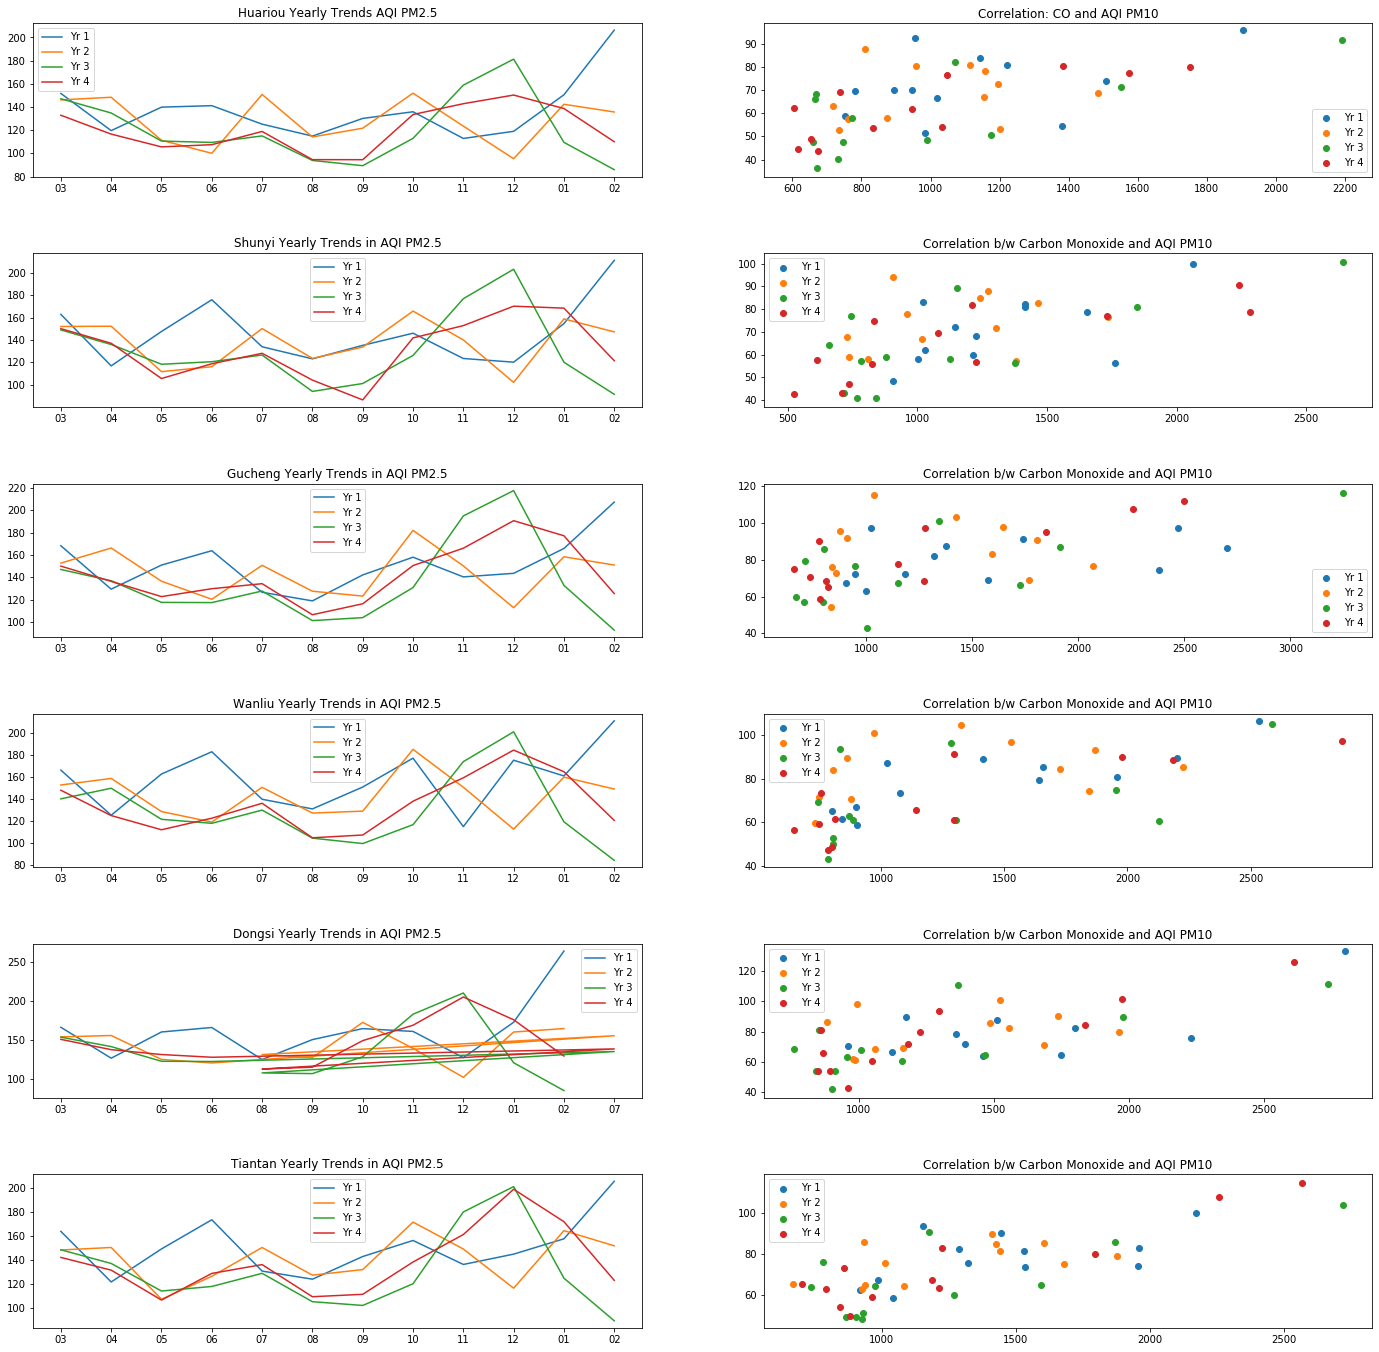

In [62]:
#create 4 trendlines for each city, for both AQI 2.5 and AQI 10. Need to create a subplot matrix that holds the Pm2.5 
#and pm10 trend graphs side by side for each city. 


#subplot grid should be 2 columns, #x districts. 

fig, ax =  plt.subplots(6,2,figsize=(24,24))

ax[0,0].plot(huariou_yr1_aqis_month['month'], huariou_yr1_aqis_month['AQI PM2.5'])
ax[0,0].plot(huariou_yr2_aqis_month['month'], huariou_yr2_aqis_month['AQI PM2.5'])
ax[0,0].plot(huariou_yr3_aqis_month['month'], huariou_yr3_aqis_month['AQI PM2.5'])
ax[0,0].plot(huariou_yr4_aqis_month['month'], huariou_yr4_aqis_month['AQI PM2.5'])
ax[0,0].set_title('Huariou Yearly Trends AQI PM2.5')
ax[0,0].legend(['Yr 1', 'Yr 2', 'Yr 3', 'Yr 4'])

ax[0,1].scatter(huariou_yr1_aqis_month['CO'], huariou_yr1_aqis_month['AQI PM10'])
ax[0,1].scatter(huariou_yr2_aqis_month['CO'], huariou_yr2_aqis_month['AQI PM10'])
ax[0,1].scatter(huariou_yr3_aqis_month['CO'], huariou_yr3_aqis_month['AQI PM10'])
ax[0,1].scatter(huariou_yr4_aqis_month['CO'], huariou_yr4_aqis_month['AQI PM10'])
ax[0,1].legend(['Yr 1', 'Yr 2', 'Yr 3', 'Yr 4'], loc = 'lower right')
ax[0,1].set_title('Correlation: CO and AQI PM10')

ax[1,0].plot(shunyi_yr1_aqis_month['month'], shunyi_yr1_aqis_month['AQI PM2.5'])
ax[1,0].plot(shunyi_yr2_aqis_month['month'], shunyi_yr2_aqis_month['AQI PM2.5'])
ax[1,0].plot(shunyi_yr3_aqis_month['month'], shunyi_yr3_aqis_month['AQI PM2.5'])
ax[1,0].plot(shunyi_yr4_aqis_month['month'], shunyi_yr4_aqis_month['AQI PM2.5'])
ax[1,0].set_title('Shunyi Yearly Trends in AQI PM2.5')
ax[1,0].legend(['Yr 1', 'Yr 2', 'Yr 3', 'Yr 4'])

ax[1,1].scatter(shunyi_yr1_aqis_month['CO'], shunyi_yr1_aqis_month['AQI PM10'])
ax[1,1].scatter(shunyi_yr2_aqis_month['CO'], shunyi_yr2_aqis_month['AQI PM10'])
ax[1,1].scatter(shunyi_yr3_aqis_month['CO'], shunyi_yr3_aqis_month['AQI PM10'])
ax[1,1].scatter(shunyi_yr4_aqis_month['CO'], shunyi_yr4_aqis_month['AQI PM10'])
ax[1,1].legend(['Yr 1', 'Yr 2', 'Yr 3', 'Yr 4'])
ax[1,1].set_title('Correlation b/w Carbon Monoxide and AQI PM10')


ax[2,0].plot(gucheng_yr1_aqis_month['month'], gucheng_yr1_aqis_month['AQI PM2.5'])
ax[2,0].plot(gucheng_yr2_aqis_month['month'], gucheng_yr2_aqis_month['AQI PM2.5'])
ax[2,0].plot(gucheng_yr3_aqis_month['month'], gucheng_yr3_aqis_month['AQI PM2.5'])
ax[2,0].plot(gucheng_yr4_aqis_month['month'], gucheng_yr4_aqis_month['AQI PM2.5'])
ax[2,0].set_title('Gucheng Yearly Trends in AQI PM2.5')
ax[2,0].legend(['Yr 1', 'Yr 2', 'Yr 3', 'Yr 4'])

ax[2,1].scatter(gucheng_yr1_aqis_month['CO'], gucheng_yr1_aqis_month['AQI PM10'])
ax[2,1].scatter(gucheng_yr2_aqis_month['CO'], gucheng_yr2_aqis_month['AQI PM10'])
ax[2,1].scatter(gucheng_yr3_aqis_month['CO'], gucheng_yr3_aqis_month['AQI PM10'])
ax[2,1].scatter(gucheng_yr4_aqis_month['CO'], gucheng_yr4_aqis_month['AQI PM10'])
ax[2,1].legend(['Yr 1', 'Yr 2', 'Yr 3', 'Yr 4'])
ax[2,1].set_title('Correlation b/w Carbon Monoxide and AQI PM10')

ax[3,0].plot(wanliu_yr1_aqis_month['month'], wanliu_yr1_aqis_month['AQI PM2.5'])
ax[3,0].plot(wanliu_yr2_aqis_month['month'], wanliu_yr2_aqis_month['AQI PM2.5'])
ax[3,0].plot(wanliu_yr3_aqis_month['month'], wanliu_yr3_aqis_month['AQI PM2.5'])
ax[3,0].plot(wanliu_yr4_aqis_month['month'], wanliu_yr4_aqis_month['AQI PM2.5'])
ax[3,0].set_title('Wanliu Yearly Trends in AQI PM2.5')
ax[3,0].legend(['Yr 1', 'Yr 2', 'Yr 3', 'Yr 4'])

ax[3,1].scatter(wanliu_yr1_aqis_month['CO'], wanliu_yr1_aqis_month['AQI PM10'])
ax[3,1].scatter(wanliu_yr2_aqis_month['CO'], wanliu_yr2_aqis_month['AQI PM10'])
ax[3,1].scatter(wanliu_yr3_aqis_month['CO'], wanliu_yr3_aqis_month['AQI PM10'])
ax[3,1].scatter(wanliu_yr4_aqis_month['CO'], wanliu_yr4_aqis_month['AQI PM10'])
ax[3,1].legend(['Yr 1', 'Yr 2', 'Yr 3', 'Yr 4'])
ax[3,1].set_title('Correlation b/w Carbon Monoxide and AQI PM10')

ax[4,0].plot(dongsi_yr1_aqis_month['month'], dongsi_yr1_aqis_month['AQI PM2.5'])
ax[4,0].plot(dongsi_yr2_aqis_month['month'], dongsi_yr2_aqis_month['AQI PM2.5'])
ax[4,0].plot(dongsi_yr3_aqis_month['month'], dongsi_yr3_aqis_month['AQI PM2.5'])
ax[4,0].plot(dongsi_yr4_aqis_month['month'], dongsi_yr4_aqis_month['AQI PM2.5'])
ax[4,0].set_title('Dongsi Yearly Trends in AQI PM2.5')
ax[4,0].legend(['Yr 1', 'Yr 2', 'Yr 3', 'Yr 4'])

ax[4,1].scatter(dongsi_yr1_aqis_month['CO'], dongsi_yr1_aqis_month['AQI PM10'])
ax[4,1].scatter(dongsi_yr2_aqis_month['CO'], dongsi_yr2_aqis_month['AQI PM10'])
ax[4,1].scatter(dongsi_yr3_aqis_month['CO'], dongsi_yr3_aqis_month['AQI PM10'])
ax[4,1].scatter(dongsi_yr4_aqis_month['CO'], dongsi_yr4_aqis_month['AQI PM10'])
ax[4,1].legend(['Yr 1', 'Yr 2', 'Yr 3', 'Yr 4'])
ax[4,1].set_title('Correlation b/w Carbon Monoxide and AQI PM10')

ax[5,0].plot(tiantan_yr1_aqis_month['month'], tiantan_yr1_aqis_month['AQI PM2.5'])
ax[5,0].plot(tiantan_yr2_aqis_month['month'], tiantan_yr2_aqis_month['AQI PM2.5'])
ax[5,0].plot(tiantan_yr3_aqis_month['month'], tiantan_yr3_aqis_month['AQI PM2.5'])
ax[5,0].plot(tiantan_yr4_aqis_month['month'], tiantan_yr4_aqis_month['AQI PM2.5'])
ax[5,0].set_title('Tiantan Yearly Trends in AQI PM2.5')
ax[5,0].legend(['Yr 1', 'Yr 2', 'Yr 3', 'Yr 4'], loc = 'best')

ax[5,1].scatter(tiantan_yr1_aqis_month['CO'], tiantan_yr1_aqis_month['AQI PM10'])
ax[5,1].scatter(tiantan_yr2_aqis_month['CO'], tiantan_yr2_aqis_month['AQI PM10'])
ax[5,1].scatter(tiantan_yr3_aqis_month['CO'], tiantan_yr3_aqis_month['AQI PM10'])
ax[5,1].scatter(tiantan_yr4_aqis_month['CO'], tiantan_yr4_aqis_month['AQI PM10'])
ax[5,1].legend(['Yr 1', 'Yr 2', 'Yr 3', 'Yr 4'])
ax[5,1].set_title('Correlation b/w Carbon Monoxide and AQI PM10')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)















